In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

As Musa has found and added zip code info into his model, I will copy his formst to both bee on the same page and to see if I can learn more about these varibles by looking through and modeling the data myself. ALl of theintiial data cleaning was done by Musa.

In [2]:
df=pd.read_csv('/Users/Arsh/Flatiron/selected_csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cond_num,grade_num,view_num
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2.0,4.0,0.0
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,4.0,0.0
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2.0,3.0,0.0
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,...,1965,0.0,98136,47.5208,-122.393,1360,5000,4.0,4.0,0.0
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0,5.0,0.0


In [3]:
def data_clean(col_name, df2):
    Q1 = df2[col_name].quantile(.25)
    Q3 = df2[col_name].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2[col_name] <= out_top]
    df2 = df2[df2[col_name] >= out_bottom]
    return df2

In [4]:
df2 = data_clean("bedrooms", df)
df2.drop("Unnamed: 0", axis = 1, inplace = True)
df2.drop("lat", axis = 1, inplace = True)
df2.drop("long", axis = 1, inplace = True)
df2.drop("sqft_above", axis = 1, inplace = True)
df2 = df2.dropna(subset = ['yr_renovated', 'waterfront'])
df2 = data_clean("price", df2)
df2.bathrooms = df2.bathrooms.astype(int)
df3 = df2.drop(columns=['id','date', 'waterfront', 'view', 'condition', 'grade'])

In [5]:
df3.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
sqft_living15      0
sqft_lot15         0
cond_num         303
grade_num        303
view_num         303
dtype: int64

In [6]:
df3 = df3.dropna()

I am trying to make a model with just the variables in the original dataset to see if anything pops out.

In [7]:
X = df3.drop(columns=['price'])
y = df3['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     841.2
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:21:23   Log-Likelihood:            -1.8017e+05
No. Observations:               13594   AIC:                         3.604e+05
Df Residuals:                   13579   BIC:                         3.605e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.791e+07   2.47e+06     -7.251      0.000   -2.28e+07   -1.31e+07
bedrooms      -2.779e+04   1921.184    -14.463      0.000   -3.16e+04    -2.4e+04
bathrooms      3.827e+04   2984.930     12.823      0.000    3.24e+04    4.41e+04
sqft_living     104.0323      3.424     30.386      0.000      97.321     110.743
sqft_lot          0.1502      0.042      3.605      0.000       0.069       0.232
floors         6.091e+04   3183.862     19.131      0.000    5.47e+04    6.72e+04
sqft_basement    14.0948      3.985      3.537      0.000       6.284      21.906
yr_built      -2112.8875     58.884    -35.882      0.000   -2228.308   -1997.467
yr_renovated      8.0172      3.370      2.379      0.017       1.412      14.622
zipcode         225.0430     24.839      9.060      0.000     176.356     273.730
sqft_living15    99.2145      3.148     31.512      0.000      93.043     105.386
sqft_lot15       -0.2458      0.063     -3.889      0.000      -0.370      -0.122
cond_num      -1920.8945   1856.114     -1.035      0.301   -5559.135    1717.346
grade_num      -424.6876   1059.909     -0.401      0.689   -2502.255    1652.880
view_num       1226.7208   1598.131      0.768      0.443   -1905.838    4359.279
==============================================================================
Omnibus:                      237.810   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.190
Skew:                           0.332   Prob(JB):                     4.70e-55
Kurtosis:                       3.020   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R squared values in the regressions results are not optimal. I am going to try to remove variables I dont beleive have a noticeable effect on price.

In [8]:
X = df3.drop(columns=['price', 'sqft_lot', 'sqft_basement', 'yr_renovated', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'cond_num', 'grade_num', 'yr_built'])
y = df3['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     664.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:21:23   Log-Likelihood:            -1.8293e+05
No. Observations:               13594   AIC:                         3.659e+05
Df Residuals:                   13588   BIC:                         3.659e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.869e+07   2.74e+06    -10.470      0.000   -3.41e+07   -2.33e+07
bedrooms    2.632e+04   2120.654     12.411      0.000    2.22e+04    3.05e+04
bathrooms   9.626e+04   2844.993     33.836      0.000    9.07e+04    1.02e+05
floors      2.916e+04   3212.031      9.080      0.000    2.29e+04    3.55e+04
zipcode      293.9411     27.929     10.525      0.000     239.196     348.686
view_num    4451.8974   1884.081      2.363      0.018     758.837    8144.958
==============================================================================
Omnibus:                      640.043   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.183
Skew:                           0.534   Prob(JB):                    6.69e-152
Kurtosis:                       2.705   Cond. No.                     1.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R squared values here are very low, and indicate that these values do not greatly impact the value of house price. So, I'm going to look at what Musa has done, which is shown in the lines of code below. 

In [9]:
urlfile='https://raw.githubusercontent.com/MusaAbbasi/Phase_2_Project/main/zipcodes.csv'
zdf = pd.read_csv(urlfile)
zdf.head()

,Unnamed: 0,ZIP Code,Classification,City,Population,Timezone,Area Code(s)
0,0,ZIP Code 98001,General,Auburn,"31,911",Pacific,253
1,1,ZIP Code 98002,General,Auburn,"31,647",Pacific,253
2,2,ZIP Code 98003,General,Federal Way,"44,151",Pacific,253
3,3,ZIP Code 98004,General,Bellevue,"27,946",Pacific,425
4,4,ZIP Code 98005,General,Bellevue,"17,714",Pacific,425


In [10]:
zipcodes = zdf

In [11]:
zipcodes['Population'] = zipcodes['Population'].str.replace(",","")
zipcodes['Population'] = zipcodes['Population'].astype(int)
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].str[-6:].astype(int)
zipcodes.drop("Classification", axis = 1, inplace = True)
zipcodes.drop("Timezone", axis = 1, inplace = True)
zipcodes.drop("Area Code(s)", axis = 1, inplace = True)
zipcodes.rename(columns={"ZIP Code": "zipcode"}, inplace = True)

In [12]:
zipcodes

,Unnamed: 0,zipcode,City,Population
0,0,98001,Auburn,31911
1,1,98002,Auburn,31647
2,2,98003,Federal Way,44151
3,3,98004,Bellevue,27946
4,4,98005,Bellevue,17714
...,...,...,...,...
115,115,98195,Seattle,0
116,116,98198,Seattle,34584
117,117,98199,Seattle,19686
118,118,98224,Baring,294


In [13]:
zipcodes.drop("Unnamed: 0", axis = 1, inplace = True)
zipcodes

,zipcode,City,Population
0,98001,Auburn,31911
1,98002,Auburn,31647
2,98003,Federal Way,44151
3,98004,Bellevue,27946
4,98005,Bellevue,17714
...,...,...,...
115,98195,Seattle,0
116,98198,Seattle,34584
117,98199,Seattle,19686
118,98224,Baring,294


In [14]:
df4 = df3.merge(zipcodes, on='zipcode', how='left')

In [15]:
df4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,cond_num,grade_num,view_num,City,Population
0,538000.0,3,2.25,2570,7242,2.0,400.0,1951,1991.0,98125,1690,7639,2.0,4.0,0.0,Seattle,37081
1,604000.0,4,3.00,1960,5000,1.0,910.0,1965,0.0,98136,1360,5000,4.0,4.0,0.0,Seattle,14770
2,510000.0,3,2.00,1680,8080,1.0,0.0,1987,0.0,98074,1800,7503,2.0,5.0,0.0,Sammamish,25748
3,229500.0,3,1.00,1780,7470,1.0,730.0,1960,0.0,98146,1780,8113,2.0,5.0,0.0,Seattle,25922
4,323000.0,3,2.50,1890,6560,2.0,0.0,2003,0.0,98038,2390,7570,3.0,4.0,0.0,Maple Valley,31171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,295000.0,3,2.50,1660,4898,2.0,0.0,2011,0.0,98038,1810,4462,2.0,5.0,0.0,Maple Valley,31171
13590,556000.0,3,3.00,1960,1168,2.0,360.0,2007,0.0,98027,2080,1423,2.0,5.0,0.0,Issaquah,26141
13591,277950.0,4,2.50,1889,6000,2.0,0.0,2012,0.0,98001,1990,6350,2.0,4.0,0.0,Auburn,31911
13592,431000.0,4,2.50,3040,6000,2.0,0.0,2007,0.0,98038,2640,6000,2.0,5.0,0.0,Maple Valley,31171


In [16]:
df4.shape

(13594, 17)

In [17]:
df4 = df4.dropna()

In [18]:
df4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,cond_num,grade_num,view_num,City,Population
0,538000.0,3,2.25,2570,7242,2.0,400.0,1951,1991.0,98125,1690,7639,2.0,4.0,0.0,Seattle,37081
1,604000.0,4,3.00,1960,5000,1.0,910.0,1965,0.0,98136,1360,5000,4.0,4.0,0.0,Seattle,14770
2,510000.0,3,2.00,1680,8080,1.0,0.0,1987,0.0,98074,1800,7503,2.0,5.0,0.0,Sammamish,25748
3,229500.0,3,1.00,1780,7470,1.0,730.0,1960,0.0,98146,1780,8113,2.0,5.0,0.0,Seattle,25922
4,323000.0,3,2.50,1890,6560,2.0,0.0,2003,0.0,98038,2390,7570,3.0,4.0,0.0,Maple Valley,31171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,295000.0,3,2.50,1660,4898,2.0,0.0,2011,0.0,98038,1810,4462,2.0,5.0,0.0,Maple Valley,31171
13590,556000.0,3,3.00,1960,1168,2.0,360.0,2007,0.0,98027,2080,1423,2.0,5.0,0.0,Issaquah,26141
13591,277950.0,4,2.50,1889,6000,2.0,0.0,2012,0.0,98001,1990,6350,2.0,4.0,0.0,Auburn,31911
13592,431000.0,4,2.50,3040,6000,2.0,0.0,2007,0.0,98038,2640,6000,2.0,5.0,0.0,Maple Valley,31171


In [19]:
X_zipcode = pd.get_dummies(df4['zipcode'], drop_first = True)
X_zipcode

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df4 = pd.concat([df4, X_zipcode], axis = 1)
df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,538000.0,3,2.25,2570,7242,2.0,400.0,1951,1991.0,98125,...,0,0,0,0,0,0,0,0,0,0
1,604000.0,4,3.00,1960,5000,1.0,910.0,1965,0.0,98136,...,0,0,0,0,0,0,0,0,0,0
2,510000.0,3,2.00,1680,8080,1.0,0.0,1987,0.0,98074,...,0,0,0,0,0,0,0,0,0,0
3,229500.0,3,1.00,1780,7470,1.0,730.0,1960,0.0,98146,...,1,0,0,0,0,0,0,0,0,0
4,323000.0,3,2.50,1890,6560,2.0,0.0,2003,0.0,98038,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df5 = df4.drop(columns=['zipcode', 'sqft_lot', 'sqft_basement', 'yr_renovated', 'sqft_lot15', 'cond_num', 'yr_built'])
df5

,price,bedrooms,bathrooms,sqft_living,floors,sqft_living15,grade_num,view_num,City,Population,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,538000.0,3,2.25,2570,2.0,1690,4.0,0.0,Seattle,37081,...,0,0,0,0,0,0,0,0,0,0
1,604000.0,4,3.00,1960,1.0,1360,4.0,0.0,Seattle,14770,...,0,0,0,0,0,0,0,0,0,0
2,510000.0,3,2.00,1680,1.0,1800,5.0,0.0,Sammamish,25748,...,0,0,0,0,0,0,0,0,0,0
3,229500.0,3,1.00,1780,1.0,1780,5.0,0.0,Seattle,25922,...,1,0,0,0,0,0,0,0,0,0
4,323000.0,3,2.50,1890,2.0,2390,4.0,0.0,Maple Valley,31171,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,295000.0,3,2.50,1660,2.0,1810,5.0,0.0,Maple Valley,31171,...,0,0,0,0,0,0,0,0,0,0
13590,556000.0,3,3.00,1960,2.0,2080,5.0,0.0,Issaquah,26141,...,0,0,0,0,0,0,0,0,0,0
13591,277950.0,4,2.50,1889,2.0,1990,4.0,0.0,Auburn,31911,...,0,0,0,0,0,0,0,0,0,0
13592,431000.0,4,2.50,3040,2.0,2640,5.0,0.0,Maple Valley,31171,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df5

,price,bedrooms,bathrooms,sqft_living,floors,sqft_living15,grade_num,view_num,City,Population,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,538000.0,3,2.25,2570,2.0,1690,4.0,0.0,Seattle,37081,...,0,0,0,0,0,0,0,0,0,0
1,604000.0,4,3.00,1960,1.0,1360,4.0,0.0,Seattle,14770,...,0,0,0,0,0,0,0,0,0,0
2,510000.0,3,2.00,1680,1.0,1800,5.0,0.0,Sammamish,25748,...,0,0,0,0,0,0,0,0,0,0
3,229500.0,3,1.00,1780,1.0,1780,5.0,0.0,Seattle,25922,...,1,0,0,0,0,0,0,0,0,0
4,323000.0,3,2.50,1890,2.0,2390,4.0,0.0,Maple Valley,31171,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,295000.0,3,2.50,1660,2.0,1810,5.0,0.0,Maple Valley,31171,...,0,0,0,0,0,0,0,0,0,0
13590,556000.0,3,3.00,1960,2.0,2080,5.0,0.0,Issaquah,26141,...,0,0,0,0,0,0,0,0,0,0
13591,277950.0,4,2.50,1889,2.0,1990,4.0,0.0,Auburn,31911,...,0,0,0,0,0,0,0,0,0,0
13592,431000.0,4,2.50,3040,2.0,2640,5.0,0.0,Maple Valley,31171,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X = df5.drop(columns=['price'])
y = df5['price']

model_3 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_3.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

This is the model Musa created. After this, we decided to look at the relationship betweeen different variables, such as number of bathrooms, bedrooms, and house price. My initial groupbys were very odd as bathrooms were stored as floats, not integers, creating tables that had houses with integer values for bedrooms (1,2,3), and float values for bathrooms (1,5, 2.25,). 

In [25]:
df.groupby(['cond_num', 'grade_num'])['price'].median()

cond_num  grade_num
0.0       1.0          225000.0
          2.0          340000.0
          3.0          501000.0
          4.0          330000.0
1.0       1.0          275975.0
          2.0          537000.0
          3.0          413000.0
          4.0          455000.0
          5.0          542500.0
          6.0          502500.0
          7.0          680500.0
2.0       1.0          362500.0
          2.0          390000.0
          3.0          445650.0
          4.0          450000.0
          5.0          455000.0
          6.0          455000.0
          7.0          445000.0
          8.0          466000.0
          9.0          410000.0
          10.0         416500.0
3.0       1.0          510000.0
          2.0          433000.0
          3.0          445000.0
          4.0          450000.0
          5.0          445000.0
          6.0          431500.0
          7.0          436925.0
          8.0          445000.0
          9.0          596500.0
          10.0      

In [26]:
df.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [27]:
df.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [37]:
df2.groupby(['bedrooms', 'bathrooms'])['price'].median().head(21)

bedrooms  bathrooms
2         0            335000.0
          1            350000.0
          2            450000.0
          3            533000.0
3         0            229975.0
          1            350000.0
          2            439950.0
          3            555000.0
          4            858450.0
4         0            520000.0
          1            408725.0
          2            515000.0
          3            675000.0
          4            775250.0
          5            784500.0
5         1            405600.0
          2            511000.0
          3            625000.0
          4            742000.0
          5            740000.0
          6            900000.0
Name: price, dtype: float64

In [40]:
df2.groupby(['bathrooms', 'bedrooms'])['price'].median().head(22)

bathrooms  bedrooms
0          2           335000.0
           3           229975.0
           4           520000.0
1          2           350000.0
           3           350000.0
           4           408725.0
           5           405600.0
2          2           450000.0
           3           439950.0
           4           515000.0
           5           511000.0
3          2           533000.0
           3           555000.0
           4           675000.0
           5           625000.0
4          3           858450.0
           4           775250.0
           5           742000.0
5          4           784500.0
           5           740000.0
6          5           900000.0
Name: price, dtype: float64

In [31]:
d3 = df3.drop(columns=['sqft_lot', 'sqft_basement', 'yr_renovated', 'sqft_lot15', 'cond_num', 'grade_num', 'yr_built'])


<AxesSubplot:>

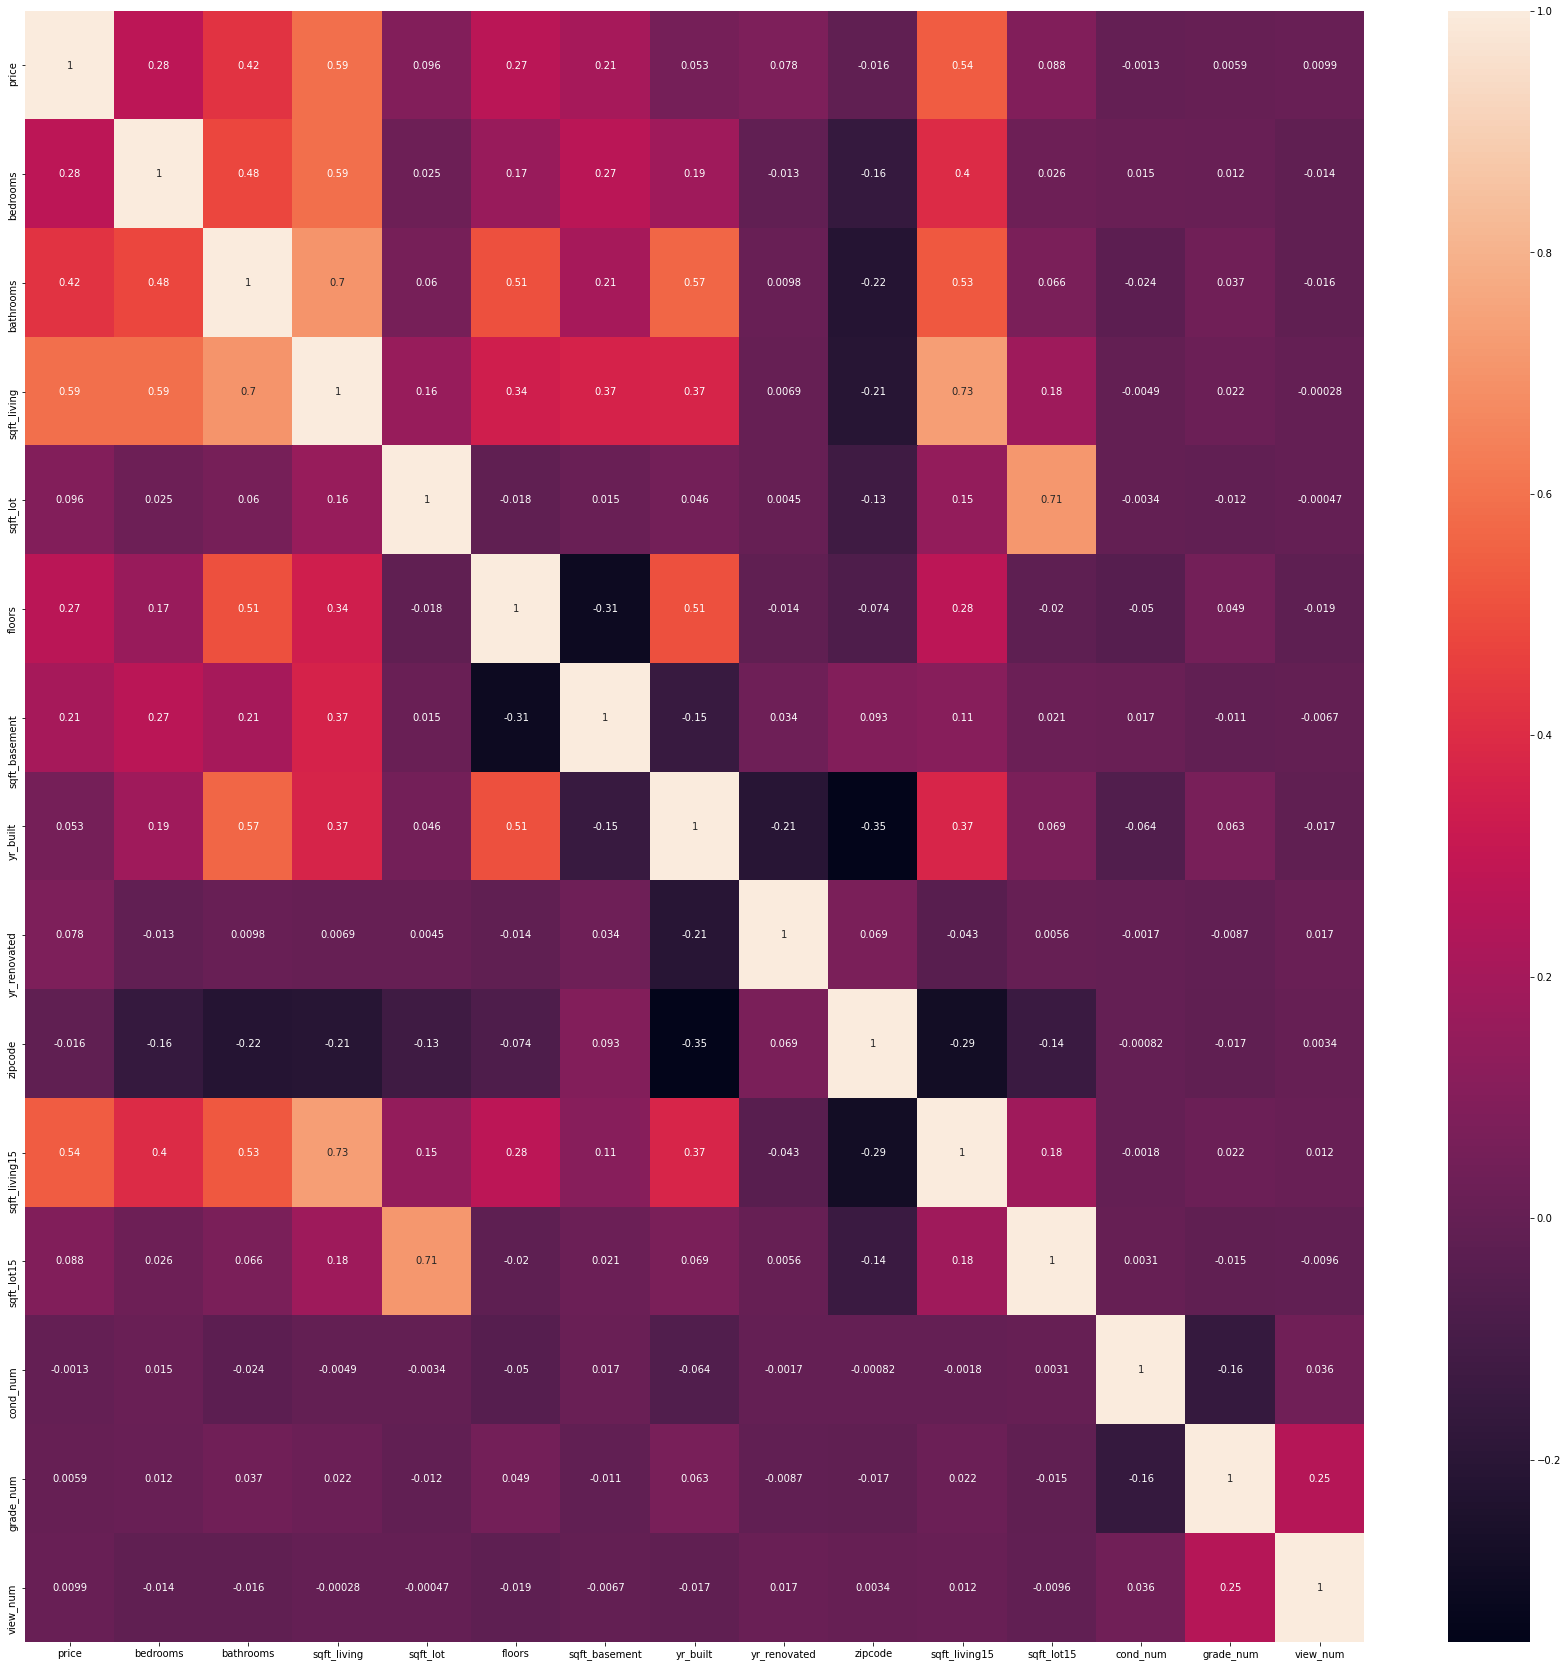

In [44]:
plt.figure(figsize = (30,30))
sns.heatmap(df3.corr(), annot = True)